In [1]:
import os
import cv2
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
data_dir = '../data/raw/planet/train-jpg'
train_y = pd.read_csv('../data/raw/planet/train_classes.csv')

In [3]:
train_y.tail()

image_name                                           tags
40474  train_40474                                  clear primary
40475  train_40475                                         cloudy
40476  train_40476                      agriculture clear primary
40477  train_40477                 agriculture clear primary road
40478  train_40478  agriculture cultivation partly_cloudy primary

In [4]:
unique_tags = set()

for temp_list in train_y.tags.apply(lambda x: x.split(' ')):
    unique_tags.update(temp_list)

for temp_tag in unique_tags:
    train_y[temp_tag] = train_y.tags.apply(lambda x: temp_tag in x)

unique_tags = list(unique_tags)
# Переставляем метки в порядке написания в README
train_y = train_y[[
    'image_name',
    'clear',
    'partly_cloudy',
    'cloudy',
    'haze',
    'agriculture',
    'cultivation',
    'bare_ground',
    'conventional_mine',
    'artisinal_mine',
    'primary',
    'blooming',
    'selective_logging',
    'blow_down',
    'slash_burn',
    'habitation',
    'water',
    'road',
]]

In [5]:
train_y.head(3)

image_name  clear  partly_cloudy  cloudy   haze  agriculture  cultivation  \
0    train_0  False          False   False   True        False        False   
1    train_1   True          False   False  False         True        False   
2    train_2   True          False   False  False        False        False   

   bare_ground  conventional_mine  artisinal_mine  primary  blooming  \
0        False              False           False     True     False   
1        False              False           False     True     False   
2        False              False           False     True     False   

   selective_logging  blow_down  slash_burn  habitation  water   road  
0              False      False       False       False  False  False  
1              False      False       False       False   True  False  
2              False      False       False       False  False  False

## Примеры изображений для каждой метки

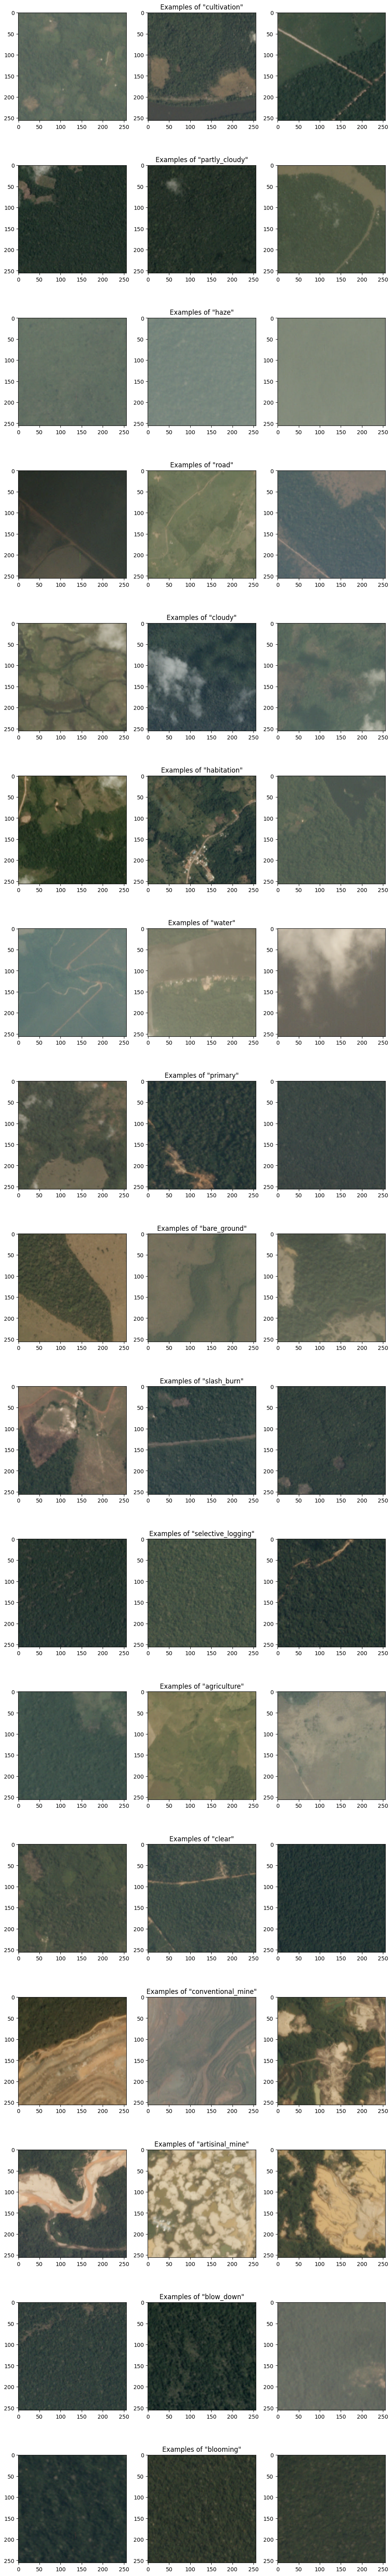

In [6]:
tag_example_count = 3
fig, axes = plt.subplots(len(unique_tags), tag_example_count, figsize=(12, len(unique_tags) * 5))

plt.subplots_adjust(hspace=0.1)

for temp_row_ind, temp_tag in enumerate(unique_tags):
    images_name_list = train_y[train_y[temp_tag]].image_name.sample(tag_example_count)

    axes[temp_row_ind][tag_example_count // 2].set_title(f'Examples of "{temp_tag}"')
    
    for temp_col_ind, temp_image_name in enumerate(images_name_list):
        temp_img = cv2.imread(os.path.join(data_dir, temp_image_name) + '.jpg')
        temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
        axes[temp_row_ind][temp_col_ind].imshow(temp_img)

При просмотре изображений появилось 2 гипотезы:
1. Для определения облачности не обязательно использовать нейросеть, а применить эвристики (если данные метки будут мешать обучению)
2. На некоторых фотографиях я и сам не узнаю некоторые метки, что говорит о сложности датасета или грязных данных

## Статистика меток

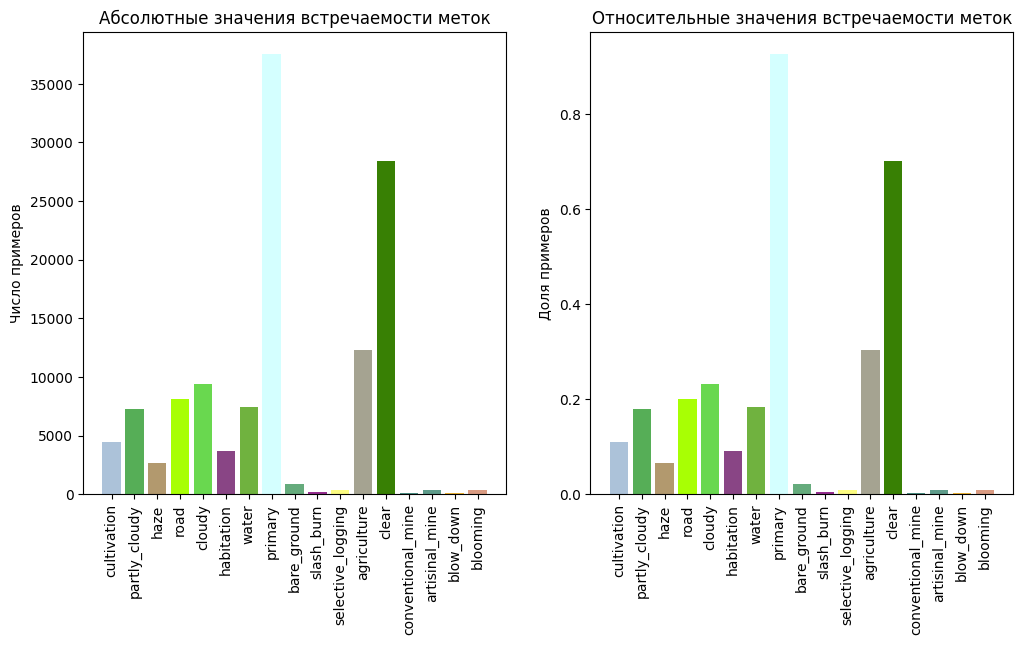

In [7]:
abs_values = train_y[unique_tags].sum()
colors_pallete = list(mcolors.colorConverter.colors.values())
colors = [
    '#acc2d9',
    '#56ae57',
    '#b2996e',
    '#a8ff04',
    '#69d84f',
    '#894585',
    '#70b23f',
    '#d4ffff',
    '#65ab7c',
    '#952e8f',
    '#fcfc81',
    '#a5a391',
    '#388004',
    '#4c9085',
    '#5e9b8a',
    '#efb435',
    '#d99b82',
 ]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Абсолютные значения встречаемости меток')
plt.ylabel('Число примеров')
plt.bar(abs_values.index, abs_values.values, color=colors)
plt.xticks(rotation=90)

ratio_values = abs_values / train_y.shape[0]

plt.subplot(1, 2, 2)
plt.title('Относительные значения встречаемости меток')
plt.ylabel('Доля примеров')
plt.bar(ratio_values.index, ratio_values.values, color=colors)
plt.xticks(rotation=90);

В выборке присутствует дисбаланс классов, что следует учесть при обучении модели

## Корреляция меток

In [8]:
corr_matrix = train_y.drop(columns=['image_name']).corr()
corr_matrix.style.background_gradient(cmap='Greens', axis=0)